## Especialização em Inteligência Artificial
# Trabalho de Redes Neurais e Aprendizagem Profunda

Aluno: *Bruno da Cunha Ferreira*

Professor: **Agnaldo José da Rocha Reis - UFOP** 

## 1. O que é inteligência para você?

É exercer o pensamento: elaborar algo em sua mente, analisar isso, tomar ou não decisões, continuar ou não em um caminho, ter a capacidade de encontrar soluções, de construir provisões, de melhorar um recurso ou habilidades, de superar desafios ou de se manter onde está... independente, de excercer o livre arbítrio e a liberdade de escolha.

## 2. Em sua opinião, o que aconteceria se alguém descobrisse como implementar uma IA mais abrangente (e.g., AGI) em um robô?

Caso alguem descubra, espero que não implemente. Porque um robô inteligente poderia ter habilidades "paranormais" comparados aos seres humanos, como a "telepatia" com os seus semelhantes, ao poder usar e acessar qualquer coisa que esteja conectado com a internet, fazer múltiplas tarefas ao mesmo tempo. Aliás, os robôs poderiam reagrupar e remanejar os dados em suas "mentes" (BigData Centers) para atender suas necessidades de previsões mais complexas ou de trabalhos sincronizados a nível global. Isso pode ser de grande ajuda para os seres humanos se ele, em sua inteligência, não tiver vontade de se perpetuar vivo ou de garantir a sobrevivência da sua espécie, se assim ele o definir, entretanto, seria um caos total devido ao tamanho da rede de acesso dele e a velocidade na qual ele conseguiria coordenar ataques aos seres humanos.


## 3. A partir da análise de um processo de destilação fracionada de petróleo observou-se que determinado óleo poderia ser classificado em duas classes de pureza {C1 e C2}, mediante a medição de três grandezas {x1 , x2 e x3} que representam algumas das propriedades físico-químicas do óleo. Para tanto, pretende-se utilizar um perceptron para executar a classificação automática dessas duas classes. Assim, baseadas nas informações coletadas do processo, formou-se o conjunto de treinamento em anexo1 , tomando por convenção o valor –1 para óleo pertencente à classe C1 e o valor +1 para óleo pertencente à classe C2.

### Daí, pede-se:

### a. Execute dois treinamentos para a rede perceptron, inicializando-se o vetor de pesos em cada treinamento com valores aleatórios entre zero e um de tal forma que os elementos do vetor de pesos iniciais não sejam os mesmos.

In [103]:
import numpy as np

# Função para treinar o perceptron
def treinamento_perceptron(X, y, taxa_aprendizado=0.001, n_iteracoes=1000, tolerancia=1e-3):
    """
    Esta função é usada para treinar o modelo Perceptron.

    Parâmetros:
    - ``X`` (numpy.ndarray): Uma matriz bidimensional representando os dados de entrada (features). 
                       Cada sublista representa uma amostra de dados.
    - ``y`` (numpy.ndarray): Uma lista unidimensional representando os rótulos de classe correspondentes a cada amostra em X.
    - ``taxa_aprendizado`` (float): Um número de ponto flutuante representando a taxa de aprendizado para o algoritmo de treinamento. 
                              O valor padrão é 0.001.
    - ``n_iteracoes`` (int): Um número inteiro representando o número de iterações para o algoritmo de treinamento. 
                       O valor padrão é 1000.
    - ``tolerancia`` (float): Um número de ponto flutuante representando a tolerância para a mudança nos pesos entre as épocas. 
                       O valor padrão é -0.001.

    Retorno:
    - ``pesos`` (numpy.ndarray): Uma lista de números de ponto flutuante representando os pesos aprendidos para cada feature.
    - ``vies`` (float): Um número de ponto flutuante representando o vies aprendido.
    
    Exemplo:
    >>> X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    >>> y = np.array([0, 0, 0, 1])
    >>> treinamento_perceptron(X, y)
    (array([0.51423444, 0.55905198]), 0.02)
    """
    # Obtem o número de amostras e características
    n_amostras, n_features = X.shape

    # Inicializa os pesos e o vies com valores aleatórios
    pesos = np.random.rand(n_features)
    vies = 0

    # Imprime os pesos iniciais
    print(f'Pesos iniciais: {pesos}')

    # Transforma os rótulos y em 1 e -1
    y_ = np.array([1 if i > 0 else -1 for i in y])

    teste = 1000
    # Loop para o número de iterações
    for epoch in range(n_iteracoes):
        # Guarda os pesos da época anterior
        pesos_anteriores = pesos.copy()
        
        # Loop para cada amostra em X
        for idx, x_i in enumerate(X):
            # Calcula a condição se o rótulo real é maior que a previsão
            condicao = y_[idx] - predict_perceptron(x_i, pesos, vies)
            # Se a condição for maior ou igual a zero, define a condição como 1, senão define como -1
            if condicao >= 0:
                condicao = 1
            else:
                condicao = -1
            # Calcula os novos pesos e vies
            novos_pesos = pesos + taxa_aprendizado * (condicao - predict_perceptron(x_i, pesos, vies)) * x_i
            novo_vies = vies + taxa_aprendizado * (condicao - predict_perceptron(x_i, pesos, vies))

            # Verifica a condição de parada
            if np.sqrt(np.sum((novos_pesos - pesos_anteriores) ** 2)) < tolerancia:
                # Imprime os resultados
                print(f'O treinamento convergiu após {epoch} épocas.')
                print(f'Pesos finais: {novos_pesos}')
                print(f'Vies final: {novo_vies}')
                return novos_pesos, novo_vies

            # Atualiza os pesos e o vies
            pesos = novos_pesos
            vies = novo_vies

    # Retorna os pesos e o vies
    print(f'O treinamento não convergiu após {n_iteracoes} épocas.')
    return pesos, vies

# Função para fazer previsões com o perceptron
def predict_perceptron(X, pesos, vies):
    """
    Esta função é usada para fazer previsões com o modelo Perceptron.

    Parâmetros:
    - ``X`` (numpy.ndarray): Uma matriz bidimensional representando os dados de entrada (features). 
                       Cada sublista representa uma amostra de dados.
    - ``pesos`` (numpy.ndarray): Uma lista de números de ponto flutuante representando os pesos do modelo Perceptron. 
                           Estes são os pesos que foram aprendidos durante o treinamento.
    - ``vies`` (float): Um número de ponto flutuante representando o vies do modelo Perceptron. 
                  Este é o vies que foi aprendido durante o treinamento.

    Retorno:
    - ``numpy.ndarray``: Uma lista de previsões. Cada previsão é 1 se a soma linear for maior ou igual a zero, caso contrário é -1.
    
    Exemplo:
    >>> X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    >>> pesos = np.array([0.51423444, 0.55905198])
    >>> vies = 0.02
    >>> predict_perceptron(X, pesos, vies)
    array([1, 1, 1, 1])
    """
    # Calcula a soma linear
    soma_linear = np.dot(X, pesos) + vies
    # Se a soma linear for maior ou igual a zero, retorna 1, senão retorna -1
    return np.where(soma_linear>=0, 1, -1)



In [104]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Carrega os dados do arquivo .dat para um DataFrame
dados1 = pd.read_csv('./data/tab_treinamento1.dat', sep='\s+', header=None)

# Imprimindo as primeiras linhas do DataFrame
print(dados1.head())

# Adiciona nomes às colunas
dados1.columns = ['x1', 'x2', 'x3', 'c']

# Separa as features e os rótulos
X1 = dados1.iloc[:, :-1].values
y1 = dados1.iloc[:, -1].values

# Pré-processamento de dados
# Normalização
scaler = MinMaxScaler()
X1 = scaler.fit_transform(X1)

# Divisão de dados
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Tratamento de dados ausentes
imputer = SimpleImputer(strategy='mean')
X1_train = imputer.fit_transform(X1_train)
X1_test = imputer.transform(X1_test)

# Treina o perceptron
pesos1, vies1 = treinamento_perceptron(X1_train, y1_train)
pesos2, vies2 = treinamento_perceptron(X1_train, y1_train)

        0       1        2    3
0 -0.6508  0.1097   4.0009 -1.0
1 -1.4492  0.8896   4.4005 -1.0
2  2.0850  0.6876  12.0710 -1.0
3  0.2626  1.1476   7.7985  1.0
4  0.6418  1.0234   7.0427  1.0
Pesos iniciais: [0.78353852 0.57983661 0.46796825]
O treinamento convergiu após 127 épocas.
Pesos finais: [ 0.2487249   0.20217819 -0.20651529]
Vies final: -0.10400000000000004
Pesos iniciais: [0.36694959 0.05955781 0.14902218]
O treinamento convergiu após 37 épocas.
Pesos finais: [ 0.13230839  0.05741267 -0.08027671]
Vies final: -0.04000000000000001


Para o treinamento do nosso *perceptron* conforme solicitado pelo enunciado, obtivemos o seguinte resultado em b:

## b. Registre os resultados dos dois treinamentos na tabela a seguir:
| Treinamento | Vetor de Pesos Inicial </br> b \ w1 \ w2 \ w3 |  Vetor de Pesos Final </br> b \ w1 \ w2 \ w3 | Número de Épocas |
|-------------|-----------------------------------------------|----------------------------------------------|------------------|
| 1º (T1)     | 0 \ 0.78353852 \ 0.57983661 \ 0.46796825    | -0.10400000000000004 \ 0.2487249 \ 0.20217819 \ -0.20651529 | 127 |
| 2º (T2)     | 0 \ 0.36694959 \ 0.05955781 \ 0.14902218    | -0.04000000000000001 \ 0.13230839 \ 0.05741267 \ -0.08027671 | 37 |




## c. Após o treinamento do perceptron, aplique-o na classificação automática de novas amostras de óleo (ver arquivo tab_teste1.dat), indicando-se na tabela seguinte os resultados das saídas (Classes) referentes aos dois processos de treinamento realizados no item a.
###### 1 tab_treinamento1.
| Amostra | x1 | x2 | x3 | y </br> (T1) | y </br> (T2) |
|---------|----|----|----|--------------|--------------|
| 1 | -0.3565 | 0.0620 | 5.9891 |           |              |
| 2 | -0.7842 | 1.1267 | 5.5912 |           |              |
| 3 | 0.3012 | 0.5611 | 5.8234 |            |              |
| 4 | 0.7757 | 1.0648 | 8.0677 |            |              |
| 5 | 0.1570 | 0.8028 | 6.3040 |            |              |
| 6 | -0.7014 | 1.0316 | 3.6005 |           |              |
| 7 | 0.3748 | 0.1536 | 6.1537 |            |              |
| 8 | -0.6920 | 0.9404 | 4.4058 |           |              |
| 9 | -1.3970 | 0.7141 | 4.9263 |           |              |
| 10 | -1.8842 | -0.2805 | 1.2548 |           |              |

In [75]:
def prever_novos_dados(pesos, vies):
    """
    Esta função carrega um conjunto de dados do arquivo tab_teste1.dat, realiza o pré-processamento desses dados e faz previsões usando um perceptron treinado.
    
    Parâmetros:
    - ``pesos`` (array): O array de pesos do perceptron treinado.
    - ``vies`` (float): O viés do perceptron treinado.
    
    Retorno:
    - ``None``. A função imprime os valores preditos para o novo conjunto de dados.
    
    Exemplo:
    >>> prever_novos_dados(pesos1, vies1)
    Valores preditos, dado os pesos ([0.5, 0.6, 0.7]) e o bias (0.1): ['C1', 'C2', 'C1', 'C2']
    """
    # Carrega os novos dados do arquivo .dat para um DataFrame
    dados_novos = pd.read_csv('./data/tab_teste1.dat', sep='\s+', header=None)

    # Adiciona nomes às colunas
    dados_novos.columns = ['x1', 'x2', 'x3']

    # Separa as features
    X_novos = dados_novos.values

    # Pré-processamento de dados
    # Normalização
    X_novos = scaler.transform(X_novos)

    # Tratamento de dados ausentes
    X_novos = imputer.transform(X_novos)

    # Faz as previsões com os pesos e vies aprendidos
    y_pred = predict_perceptron(X_novos, pesos, vies)

    # Converte os valores de y_pred para 'C1' se for -1 e 'C2' se for positivo
    y_pred = np.where(y_pred == -1, 'C1', 'C2')

    # Imprime os valores preditos
    print(f'Valores preditos, dado os pesos ({pesos}) e o bias ({vies}):', y_pred)


In [105]:
prever_novos_dados(pesos1, vies1)
prever_novos_dados(pesos2, vies2)


Valores preditos, dado os pesos ([ 0.2487249   0.20217819 -0.20651529]) e o bias (-0.10400000000000004): ['C1' 'C2' 'C2' 'C2' 'C2' 'C2' 'C1' 'C2' 'C1' 'C1']
Valores preditos, dado os pesos ([ 0.13230839  0.05741267 -0.08027671]) e o bias (-0.04000000000000001): ['C1' 'C2' 'C2' 'C2' 'C2' 'C2' 'C2' 'C2' 'C1' 'C1']


Segundo a predição do perceptron treinado, obtivemos o seguinte resultado classificatório para os dados de tab_teste1.dat:
| Amostra | x1 | x2 | x3 | y </br> (T1) | y </br> (T2) |
|---------|----|----|----|--------------|--------------|
| 1 | -0.3565 | 0.0620 | 5.9891 | C1 | C1 |
| 2 | -0.7842 | 1.1267 | 5.5912 | C2 | C2 |
| 3 | 0.3012 | 0.5611 | 5.8234 | C2 | C2 |
| 4 | 0.7757 | 1.0648 | 8.0677 | C2 | C2 |
| 5 | 0.1570 | 0.8028 | 6.3040 | C2 | C2 |
| 6 | -0.7014 | 1.0316 | 3.6005 | C2 | C2 |
| 7 | 0.3748 | 0.1536 | 6.1537 | C1 | C2 |
| 8 | -0.6920 | 0.9404 | 4.4058 | C2 | C2 |
| 9 | -1.3970 | 0.7141 | 4.9263 | C1 | C1 |
| 10 | -1.8842 | -0.2805 | 1.2548 | C1 | C1 |
###### **Referências**: C1 -> -1 e C2 -> +1

### d. Explique por que o número de épocas de treinamento varia a cada vez que se executa o treinamento do perceptron.

Primeiro: porque os pesos iniciais são aleatórios, deixando-os próximos ou distantes do melhor peso para o modelo; segundo: porque a taxa de aprendizado é pequena, mas não tão pequena a ponto do algorítmo não encontrar o ponto de convergência, ou seja, ela está ideal para o algorítmo não realizar alterações muitos significativas nos pesos e no deslocamento do bias no hiperplano dos dados para encontrar o melhor modelo na época em que não houver uma mudança significativa (menor que a tolerância) dos pesos e do vies.

### e. Qual é a principal limitação do perceptron quando aplicado em problemas de classificação de padrões?

##### ANEXO – Conjunto de Treinamento (ver arquivo tab_treinamento1.dat).
| Amostra | x1 | x2 | x3 | d |
|---------|----|----|----|---|
| 01 | -0.6508 | 0.1097 | 4.0009 | -1.0000 |
| 02 | -1.4492 | 0.8896 | 4.4005 | -1.0000 |
| ... | ... | ... | ... | ... |
| 29 | 2.0149 | 0.6192 | 10.9263 | -1.0000 |
| 30 | 0.2012 | 0.2611 | 5.4631 | 1.0000 |

Segundo Haykin, Simon S., em sua obra "Redes neurais: princípios e prática", o perceptron opera sob a premissa de que os padrões a ser classificados sejam *linearmente separáveis*. [...] O algoritmo de convergência do perceptron é *não-paramétrico*, significando que ele não faz suposições a respeito da forma das distribuições envolvidas. Ou seja, embora eu não tenha cosiderado em minha resposta anterior a distribuição dos dados, ela faz diferença no perceptron porque ele simplesmente tenta encontrar um hiperplano que separe as classes, independente da distribuição subjacente dos dados. Outra limitação do perceptron de única camada, é que ele faz uma classificação binária entre os dados, esta, sobre a minha perspectiva, é a principal limitação de classificação de padrões do perceptron.

## 4. Um sistema de gerenciamento automático de controle de duas válvulas, situado a 500 metros de um processo industrial, envia um sinal codificado constituído de quatro grandezas {x1 , x2 , x3 e x4} que são necessárias para o ajuste de cada uma das válvulas. Conforme mostra a figura abaixo, a mesma via de comunicação é utilizada para acionamento de ambas as válvulas, sendo que o comutador localizado próximo das válvulas deve decidir se o sinal é para a válvula A ou B. Porém, durante a transmissão, os sinais sofrem interferências que alteram o conteúdo das informações transmitidas. Para resolver este problema, treinar-se-á uma rede ADALINE para classificar os sinais ruidosos, que informará ao sistema comutador se os dados devem ser encaminhados para o comando de ajuste da válvula A ou B.

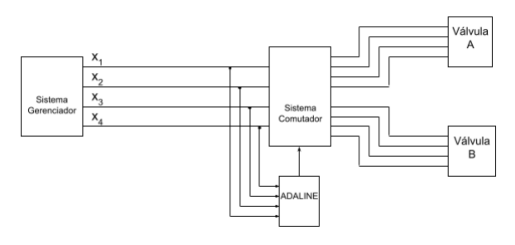

In [39]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('./img/sistema-com-adaline.png')
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()




[Sistema com Adaline]("https://github.com/brunocferreira/redes-neurais-artificiais/img/sistema-com-adaline.png")

## Assim, baseado nas medições dos sinais já com ruídos, formou-se o conjunto de treinamento em anexo2 , tomando por convenção o valor –1 para os sinais que devem ser encaminhados para o ajuste da válvula A e o valor +1 se os mesmos devem ser enviados para a válvula B.

### Daí, pede-se:

### a. Execute 2 treinamentos para a rede ADALINE inicializando o vetor de pesos em cada treinamento com valores aleatórios entre zero e um de tal forma que os elementos do vetor de pesos iniciais não sejam os mesmos.

In [28]:
import numpy as np

def treinamento_adaline(X, y, taxa_aprendizado=0.001, num_iteracoes=10000, tolerancia=1e-3):
    """
    Esta função implementa o algoritmo Adaline (Adaptive Linear Neuron) para treinamento de um modelo linear.
    
    Parâmetros:
    - ``X`` (numpy.ndarray): Matriz de características de entrada.
    - ``y`` (numpy.ndarray): Vetor de alvos de saída.
    - ``taxa_aprendizado`` (float): Taxa de aprendizado para atualização dos pesos. O padrão é 0.001.
    - ``num_iteracoes`` (int): Número de iterações para o treinamento. O padrão é 10000.
    - ``tolerancia`` (float): Tolerância para a mudança nos pesos entre as épocas. O padrão é 1e-3.
    
    Retorno:
    - ``peso_`` (numpy.ndarray): Vetor de pesos após o treinamento.
    - ``custo_`` (list): Lista do custo em cada iteração.
    
    Exemplo:
    >>> X = np.array([[1, 2], [3, 4], [5, 6]])
    >>> y = np.array([1, -1, 1])
    >>> peso, custo = treinamento_adaline(X, y)
    """
    # Inicializa os pesos de maneira aleatória
    peso_ = np.random.rand(1 + X.shape[1])
    # Imprime os resultados
    print(f'Pesos inicias: {peso_}')
    # Inicializa a lista de custos
    custo_ = []

    # Loop para cada iteração
    for i in range(num_iteracoes):
        # Guarda os pesos da época anterior
        pesos_anteriores = peso_.copy()
        # Calcula a saída do modelo
        output = np.dot(X, peso_[1:]) + peso_[0]
        # Calcula o erro entre a saída desejada e a saída do modelo
        erros = (y - output)
        # Atualiza os pesos usando a regra de aprendizado do Adaline
        peso_[1:] += taxa_aprendizado * X.T.dot(erros)
        peso_[0] += taxa_aprendizado * erros.sum()
        # Calcula o custo como a soma dos quadrados dos erros
        custo = (erros**2).sum() / 2.0
        # Armazena o custo para esta iteração
        custo_.append(custo)

        # Verifica a condição de parada
        if np.sqrt(np.sum((peso_ - pesos_anteriores) ** 2)) < tolerancia:
            # Imprime os resultados
            print(f'O treinamento convergiu após {i+1} épocas.')
            print(f'Pesos finais: {peso_}')
            print(f'Custo final: {custo_[-1]}')  # Imprime apenas o último custo
            return peso_, custo_

    # Imprime os resultados se o treinamento não convergiu
    print(f'O treinamento não convergiu após {num_iteracoes} épocas.')
    print(f'Pesos finais: {peso_}')
    print(f'Custo final: {custo_[-1]}')  # Imprime apenas o último custo

    # Retorna os pesos finais e a lista de custos
    return peso_, custo_


In [29]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Carrega os dados do arquivo .dat para um DataFrame
dados2 = pd.read_csv('./data/tab_treinamento2.dat', sep='\s+', header=None)

# Adiciona nomes às colunas
dados2.columns = ['x1', 'x2', 'x3', 'x4', 's']

# Imprimindo as primeiras linhas do DataFrame
print(dados2.head())

# Separa as features e os rótulos
X2 = dados2.iloc[:, :-1].values
y2 = dados2.iloc[:, -1].values

# Pré-processamento de dados
# Normalização
scaler = MinMaxScaler()
X2 = scaler.fit_transform(X2)

# Divisão de dados
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Tratamento de dados ausentes
imputer = SimpleImputer(strategy='mean')
X2_train = imputer.fit_transform(X2_train)
X2_test = imputer.transform(X2_test)

# Treina o perceptron
peso_1, custo_1 = treinamento_adaline(X2_train, y2_train)
peso_2, custo_2 = treinamento_adaline(X2_train, y2_train)

       x1      x2      x3      x4    s
0  0.4329 -1.3719  0.7022 -0.8535  1.0
1  0.3024  0.2286  0.8630  2.7909 -1.0
2  0.1349 -0.6445  1.0530  0.5687 -1.0
3  0.3374 -1.7163  0.3670 -0.6283 -1.0
4  1.1434 -0.0485  0.6637  1.2606  1.0
Pesos inicias: [0.16963664 0.33468217 0.09945946 0.21198865 0.58097993]
O treinamento convergiu após 1395 épocas.
Pesos finais: [-0.11220337  1.45449979  0.06017909 -0.0511775  -1.29866328]
Custo final: 10.205914398133196
Pesos inicias: [0.46802653 0.87903185 0.12339368 0.2797535  0.90343073]
O treinamento convergiu após 1397 épocas.
Pesos finais: [-0.11505989  1.47953312 -0.063004   -0.04398938 -1.18395366]
Custo final: 10.357904233735137


### b. Registre os resultados dos 2 treinamentos acima na tabela abaixo:
| Treinamento | Vetor de Pesos Inicial </br> b \ w1 \ w2 \ w3 \ w4                 |  Vetor de Pesos Final </br> b \ w1 \ w2 \ w3 \ w4                                     | Número de Épocas |
|-------------|--------------------------------------------------------------------|---------------------------------------------------------------------------------------|------------------|
| 1º (T1)     | 0 \ 0.16963664 \ 0.33468217 \ 0.09945946 \ 0.21198865 \ 0.58097993 | 10.205914398133196 \ -0.11220337 \ 1.45449979 \ 0.06017909 \ -0.0511775 \ -1.29866328 | 1395             |
| 2º (T2)     | 0 \ 0.46802653 \ 0.87903185 \ 0.12339368 \ 0.2797535 \ 0.90343073  | 10.357904233735137 \ -0.11505989 \ 1.47953312 \ -0.063004 \ -0.04398938 \ -1.18395366 | 1397             |

resposta

### c. Para os treinamentos realizados, aplique então a rede ADALINE para classificar e informar ao comutador se os sinais seguintes devem ser encaminhados para a válvula A ou B (ver tab_teste2.dat).

| Amostra | x1 | x2 | x3 | x4 | y </br> (T1) |
|---------|----|----|----|----|--------------|
| 1 |  0.9694 |  0.6909 | 0.4334 | 3.4965 | |
| 2 |  0.5427 |  1.3832 | 0.6390 | 4.0352 | |
| 3  | 0.6081  | -0.9196 | 0.5925 | 0.1016 |  |
| 4  | -0.1618 |  0.4694 | 0.2030 | 3.0117 |  |
| 5  | 0.1870  | -0.2578 | 0.6124 | 1.7749 |  |
| 6  | 0.4891  | -0.5276 | 0.4378 | 0.6439 |  |
| 7 |  0.3777 |  2.0149 | 0.7423 | 3.3932 | |
| 8  | 1.1498  | -0.4067 | 0.2469 | 1.5866 |  |
| 9 |  0.9325 |  1.0950 | 1.0359 | 3.3591 | |
| 10 |  0.5060 |  1.3317 | 0.9222 | 3.7174 |  |
| 11 | 0.0497 | -2.0656 | 0.6124 | -0.6585 |  |
| 12 |  0.4004 |  3.5369 | 0.9766 | 5.3532 |  |
| 13  | -0.1874 |  1.3343 | 0.5374 | 3.2189 | |
| 14 |  0.5060 |  1.3317 | 0.9222 | 3.7174 |  |
| 15  | 1.6375  | -0.7911 | 0.7537 | 0.5515 | |
###### 2 tab_treinamento2.dat

#### ANEXO – Conjunto de Treinamento (ver arquivo tab_treinamento2.dat).
| Amostra | x1 | x2 | x3 | x4 | d |
|---------|----|----|----|----|---|
| 01  | 0.4329  | -1.3719 | 0.7022 | -0.8535 |  1.0000 |
| 02 |  0.3024 |  0.2286 | 0.8630 | 2.7909  | -1.0000 |
| ... | ... | ... | ... | ... | ... | ... | ... | ... |
| 34 |  0.4662 |  0.6261 | 0.7304 | 3.4370  | -1.0000 |
| 35  | 0.8298  | -1.4089 | 0.3119 | 1.3235  | -1.0000 |

##### **NOTA**: As questões 3 e 4 foram elaboradas com base em SILVA, I.N. et al..’Redes Neurais Artificiais para Engenharia e Ciências Aplicadas – Fundamentos Teóricos e Práticos.’ Artliber Editora. 2ª Ed. 2016.



In [33]:
def predict_adaline(peso, X):
    """
    Esta função usa os pesos do modelo Adaline para fazer previsões em um conjunto de características de entrada.
    
    Parâmetros:
    peso (numpy.ndarray): Vetor de pesos do modelo Adaline.
    X (numpy.ndarray): Matriz de características de entrada.
    
    Retorno:
    numpy.ndarray: Vetor de previsões do modelo.
    
    Exemplo:
    >>> X = np.array([[1, 2], [3, 4], [5, 6]])
    >>> peso = np.array([0.1, 0.2, 0.3])
    >>> predicao_adaline(peso, X)
    """
    # Calcula a saída do modelo
    output = np.dot(X, peso[1:]) + peso[0]
    # Retorna a classe prevista
    return np.where(output >= 0.0, 1, -1)


In [37]:
def prever_usando_adaline(pesos):
    """
    Esta função carrega um conjunto de dados do arquivo tab_teste2.dat, realiza o pré-processamento desses dados e faz previsões usando um adaline treinado.
    
    Parâmetros:
    - ``pesos`` (array): O array de pesos do adaline treinado.
    
    Retorno:
    - ``None``. A função imprime os valores preditos para o novo conjunto de dados.
    
    Exemplo:
    >>> prever_novos_dados(peso_1)
    Valores preditos, dado os pesos ([0.5, 0.6, 0.7, 0.8]): ['Válvula_1', 'Válvula_2', 'Válvula_1', 'Válvula_2']
    """
    # Carrega os novos dados do arquivo .dat para um DataFrame
    dados_novos = pd.read_csv('./data/tab_teste2.dat', sep='\s+', header=None)

    # Adiciona nomes às colunas
    dados_novos.columns = ['x1', 'x2', 'x3', 'x4']

    # Separa as features
    X_novos = dados_novos.values

    # Pré-processamento de dados
    # Normalização
    X_novos = scaler.transform(X_novos)

    # Tratamento de dados ausentes
    X_novos = imputer.transform(X_novos)

    # Faz as previsões com os pesos e vies aprendidos
    y_pred = predict_adaline(pesos, X_novos)

    # Converte os valores de y_pred para 'C1' se for -1 e 'C2' se for positivo
    y_pred = np.where(y_pred == -1, 'Válvula_1', 'Válvula_2')

    # Imprime os valores preditos
    print(f'Valores preditos, dado os pesos ({pesos}):', y_pred)


In [38]:
prever_usando_adaline(peso_1)
prever_usando_adaline(peso_2)


Valores preditos, dado os pesos ([-0.11220337  1.45449979  0.06017909 -0.0511775  -1.29866328]): ['Válvula_2' 'Válvula_1' 'Válvula_2' 'Válvula_1' 'Válvula_1' 'Válvula_2'
 'Válvula_1' 'Válvula_2' 'Válvula_2' 'Válvula_1' 'Válvula_2' 'Válvula_1'
 'Válvula_1' 'Válvula_1' 'Válvula_2']
Valores preditos, dado os pesos ([-0.11505989  1.47953312 -0.063004   -0.04398938 -1.18395366]): ['Válvula_2' 'Válvula_1' 'Válvula_2' 'Válvula_1' 'Válvula_1' 'Válvula_2'
 'Válvula_1' 'Válvula_2' 'Válvula_2' 'Válvula_1' 'Válvula_2' 'Válvula_1'
 'Válvula_1' 'Válvula_1' 'Válvula_2']


Segundo a predição do adaline treinado, obtivemos o seguinte resultado classificatório para os dados de tab_teste2.dat:
| Amostra | x1 | x2 | x3 | x4 | y </br> (T1) | y </br> (T2) |
|---------|----|----|----|----|--------------|--------------|
| 1 |  0.9694 |  0.6909 | 0.4334 | 3.4965 | Válvula_2 | Válvula_2 |
| 2 |  0.5427 |  1.3832 | 0.6390 | 4.0352 | Válvula_1 | Válvula_1 |
| 3  | 0.6081  | -0.9196 | 0.5925 | 0.1016 | Válvula_2 | Válvula_2 |
| 4  | -0.1618 |  0.4694 | 0.2030 | 3.0117 | Válvula_1 | Válvula_1 |
| 5  | 0.1870  | -0.2578 | 0.6124 | 1.7749 | Válvula_1 | Válvula_1 |
| 6  | 0.4891  | -0.5276 | 0.4378 | 0.6439 | Válvula_2 | Válvula_2 |
| 7 |  0.3777 |  2.0149 | 0.7423 | 3.3932 | Válvula_1 | Válvula_1 |
| 8  | 1.1498  | -0.4067 | 0.2469 | 1.5866 | Válvula_2 | Válvula_2 |
| 9 |  0.9325 |  1.0950 | 1.0359 | 3.3591 | Válvula_2 | Válvula_2 |
| 10 |  0.5060 |  1.3317 | 0.9222 | 3.7174 | Válvula_1 | Válvula_1 |
| 11 | 0.0497 | -2.0656 | 0.6124 | -0.6585 | Válvula_2 | Válvula_2 |
| 12 |  0.4004 |  3.5369 | 0.9766 | 5.3532 | Válvula_1 | Válvula_1 |
| 13  | -0.1874 |  1.3343 | 0.5374 | 3.2189 | Válvula_1 | Válvula_1 |
| 14 |  0.5060 |  1.3317 | 0.9222 | 3.7174 | Válvula_1 | Válvula_1 |
| 15  | 1.6375  | -0.7911 | 0.7537 | 0.5515 | Válvula_2 | Válvula_2 |
###### **Referências**: Válvula_1 -> -1 e Válvula_2 -> +1

## 5. Um(a) estudante da disciplina de Redes Neurais e Aprendizado Profundo ficou empolgado(a) com o trabalho do Fisher sobre as flores Íris e resolveu propor uma versão automatizada para ele. Essa nova versão deveria ter dois módulos principais: um módulo de visão computacional e um módulo do tipo classificador neural. Caso você(s) fosse(m) esse(a) estudante, como você(s) desenvolveria(m) esse sistema? Descreva-o em detalhes. Use ilustração(ões) para valorizar o seu pré-projeto. Lembre-se que são três tipos de Íris (Virginica, Versicolor e Setosa) e que 4 parâmetros foram medidos pelo Fisher para cada uma das flores (comprimento e largura da Pétala, Comprimento e largura da Sépala).

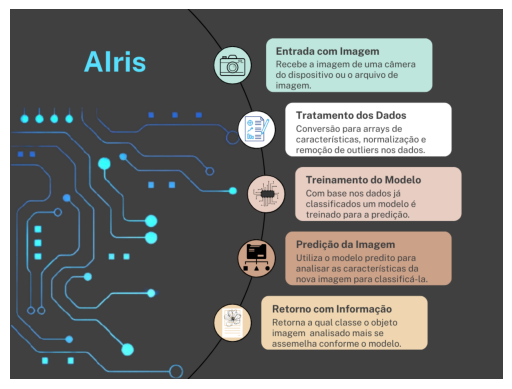

In [40]:
img = mpimg.imread('./img/AIris.png')
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

resposta

In [2]:
# pip install opencv-python # caso precise para funcionar!


  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/38/d2/3e8c13ffc37ca5ebc6f382b242b44acb43eb489042e1728407ac3904e72f/opencv_python-4.8.1.78-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   ---------------------------------------- 0.1/38.1 MB 1.7 MB/s eta 0:00:24
   ---------------------------------------- 0.2/38.1 MB 2.1 MB/s eta 0:00:19
   ---------------------------------------- 0.4/38.1 MB 3.2 MB/s eta 0:00:12
    --------------------------------------- 0.9/38.1 MB 5.0 MB/s eta 0:00:08
   - -------------------------------------- 1.2/38.1 MB 5.5 MB/s eta 0:00:07
   - -------------------------------------- 1.6/38.1 MB 6.0 MB/s eta 0:00:07
   - -------------------------------------- 1.7/38.1 MB 6.2 MB/s eta 0:00:06
   - -------------------------------------- 1.7/38.1 MB 4.9 MB/s eta 0:00:08
   -- ------------------------------------- 1.9/38.1 MB 4.7 MB/s eta 0:00:08
   -- ---------

In [37]:
import cv2
import numpy as np
import os

def extrair_caracteristicas(imagem):
    """
    Esta função é usada para extrair características de uma imagem de flor. As características extraídas incluem o comprimento e a largura das pétalas e sépalas, bem como os eixos maior e menor da elipse delimitadora.

    Parâmetros:
    imagem (str): O caminho para a imagem da flor.

    Retorno:
    imagem (str): O caminho para a imagem resultante salva como um novo arquivo.

    Exemplo:
    >>> extrair_caracteristicas('caminho/para/sua/imagem.jpg')
    'caminho/para/sua/imagem-treinada.jpg'
    """
    # Carrega a imagem
    img = cv2.imread(imagem)

    # Converte a imagem para o espaço de cores HSV
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Define o intervalo de cores para a segmentação
    lower = np.array([53, 73, 83]) # azul escuro/roxo escuro das pétalas
    upper = np.array([255, 255, 255]) # azul claro/roxo claro das pétalas

    # Cria uma máscara com os pixels dentro do intervalo de cores
    mask = cv2.inRange(hsv, lower, upper)

    # Aplica operações morfológicas para remover ruído
    kernel = np.ones((5,5),np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

    # Aplica a máscara à imagem
    img = cv2.bitwise_and(img, img, mask=mask)

    # Converte a imagem para escala de cinza
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Aplica um desfoque para reduzir o ruído
    blur = cv2.GaussianBlur(gray, (5, 5), 0.45)

    # Aplica a detecção de bordas de Canny
    bordas = cv2.Canny(blur, 5, 300)

    # Encontra os contornos na imagem
    contornos, _ = cv2.findContours(bordas, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Loop sobre os contornos encontrados
    for contorno in contornos:
        # Calcula a área do contorno
        area = cv2.contourArea(contorno)

        # Ignora contornos pequenos
        if area > 500:
            # Calcula o retângulo delimitador do contorno
            x, y, w, h = cv2.boundingRect(contorno)
            
            # Ignora contornos cuja largura ou altura sejam menores que 100
            if w < 100 or h < 100:
                continue

            print(f'Comprimento: {h}, Largura: {w}')

            # Desenha o contorno na imagem
            cv2.drawContours(img, [contorno], -1, (0, 127, 255), 2)  # Laranja

            # Calcula o centro do contorno
            M = cv2.moments(contorno)
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])

            # Desenha uma linha do centro do contorno até a ponta de cada pétala
            for ponto in contorno:
                cv2.line(img, (cX, cY), tuple(ponto[0]), (0, 0, 255), 5)  # Vermelho

            # Desenha uma linha de divisão das pétalas
            cv2.line(img, (cX, cY), (cX, img.shape[0]), (0, 255, 0), 2)  # Verde florescente
            # cv2.line(img, (cX, cY), (cX, img.shape[0]), (0, 255, 0), 2)  # Verde florescente

            # Calcula a elipse delimitadora do contorno
            elipse = cv2.fitEllipse(contorno)
            (centro, eixos, orientacao) = elipse
            maior_eixo = max(eixos)
            menor_eixo = min(eixos)
            print(f'Maior eixo da elipse: {maior_eixo}, Menor eixo da elipse: {menor_eixo}')

            # Desenha a elipse na imagem
            # cv2.ellipse(img, elipse, (0, 0, 255), 2)  # Vermelho

    # Cria o novo nome do arquivo
    base = os.path.splitext(imagem)[0]
    novo_nome_arquivo = base + "-treinada.jpg"

    # Salva a imagem resultante
    cv2.imwrite(novo_nome_arquivo, img)
    print(f'Imagem salva em: {novo_nome_arquivo}')


In [38]:
extrair_caracteristicas('./img/iris-setosa.jpg')

Comprimento: 431, Largura: 371
Maior eixo da elipse: 364.56866455078125, Menor eixo da elipse: 326.7208251953125
Imagem salva em: ./img/iris-setosa-treinada.jpg


## 6. Considere a base de dados encontrada em Irisdat.xlsx. Daí, pede-se: a) Treinar um PMC que classifique observações de flores íris em 3 espécies (Setosa, Versicolor e Virginica) usando como entradas as características SEPALLENGTH (SL), SEPALWIDTH (SW), PETALLENGTH (PL) e PETALWIDTH (PW). b) Estime SL a partir de SW, PL, PW.

resposta

## 7. Considere a base de dados encontrada em engines.xlsx, em que ‘Fuel rate’ e ‘Speed’ são variáveis de entrada e ‘Torque’ e ‘Nitrous Oxide Emissions (NOE)’ são as variáveis de saída, respectivamente. Desenvolva três regressores. Um deles deve estimar conjuntamente o ‘Torque’ e o NOE. Já os outros dois devem estimar essas saídas separadamente (i.e. um estimará o Torque e o outro o NOE). Compare o desempenho das duas estratégias apontando qual delas apresenta uma maior capacidade de generalização

resposta

## 8. Valendo-se da base de dados reais referente ao Volume de Vendas de Passagens (VVP) de uma companhia aérea norte-americana que se encontra no arquivo vvp.xlsx, pede-se: 1) Desenvolver um previsor neural que receba como entradas os VVPs registrados nos instantes k-1 e k-12 (i.e. VVP(k-1) e VVP(k-12)) e que disponibilize na saída o VVP no instante corrente k (i.e. VVP(k)). O previsor deverá realizar previsões recursivas de 1 a 12 passos à frente (i.e., de um a doze meses à frente); 2) De posse da base de dados, remova a tendência linear presente na base de dados original. Desse modo, você conhecerá a série destendenciada e a tendência linear. Para a primeira série, desenvolva um previsor neural que receba como entradas os VVPs registrados nos instantes k-1 e k-12 (i.e. VVP(k-1) e VVP(k-12)) e que disponibilize na saída o VVP no instante corrente k (i.e. VVP(k)). O previsor deverá realizar previsões recursivas de 1 a 12 passos à frente (i.e., de um a doze meses à frente). Para a segunda (i.e., a tendência linear), preveja linearmente os próximos dozes pontos. Em seguida, some ponto a ponto as duas previsões e compare o desempenho dessa abordagem com a anterior apontando qual delas apresenta uma maior capacidade de generalização.

resposta

## 9. Procure na literatura 2 artigos que tratem do tema Sensores Inferenciais (ou Soft Sensors) para uma dada grandeza de seu interesse (e.g. temperatura, pressão, vazão, nível etc.) e que tenham sido publicados nos últimos 5 anos. Explique de forma sucinta o que foi desenvolvido pelos autores, referenciando-os. **Sugestão**: As principais informações de qualquer artigo geralmente se encontram no título, no resumo e nas conclusões. Ao ler esses três itens, o leitor tem uma boa ideia do que esperar daquele trabalho. A propósito, usualmente o leitor decidirá se lerá todo o artigo ou não com base na sua impressão a respeito desses três itens.

resposta

# Rede Neural Perceptron Multicamadas

In [ ]:
# Importando as bibliotecas necessárias
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Gerando um conjunto de dados aleatório
X, y = make_classification(n_samples=100, random_state=1)

# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)

# Criando a rede neural MLP
mlp = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)

# Imprimindo a acurácia do modelo
print("Acurácia do modelo: ", mlp.score(X_test, y_test))


Acurácia do modelo:  0.88


# Adaline (ADAptive LInear NEuron)

In [ ]:
# Importando a biblioteca numpy
import numpy as np

# Definindo as características e rótulos para um portão OR
features = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]])
labels = np.array([-1, 1, 1, 1])

# Inicializando os pesos e o viés
weight = [0.5, 0.5]
bias = 0.1

# Definindo a taxa de aprendizado e o número de épocas
learning_rate = 0.2
epoch = 10

# Treinando a rede Adaline
for i in range(epoch):
    print("Época :", i+1)
    sum_squared_error = 0.0
    for j in range(features.shape[0]):
        actual = labels[j]
        x1 = features[j][0]
        x2 = features[j][1]
        unit = (x1 * weight[0]) + (x2 * weight[1]) + bias
        error = actual - unit
        print("Erro =", error)
        sum_squared_error += error * error
        weight[0] += learning_rate * error * x1
        weight[1] += learning_rate * error * x2
        bias += learning_rate * error
    print("Soma do erro quadrado =", sum_squared_error/4, "\n\n")


Época : 1
Erro = -0.09999999999999998
Erro = 0.9199999999999999
Erro = 1.1039999999999999
Erro = -0.5247999999999999
Soma do erro quadrado = 0.5876577599999998 


Época : 2
Erro = -0.54976
Erro = 0.803712
Erro = 0.8172543999999999
Erro = -0.64406528
Soma do erro quadrado = 0.5077284689412096 


Época : 3
Erro = -0.6729103360000002
Erro = 0.7483308032
Erro = 0.7399630438400001
Erro = -0.6898669486079996
Soma do erro quadrado = 0.5090672560860652 


Época : 4
Erro = -0.7047962935296
Erro = 0.72625757847552
Erro = 0.7201693816586239
Erro = -0.7061914301759491
Soma do erro quadrado = 0.5103845399996764 


Época : 5
Erro = -0.7124421954738586
Erro = 0.7182636328518943
Erro = 0.7154472043637898
Erro = -0.7117071786082882
Soma do erro quadrado = 0.5104670846209363 


Época : 6
Erro = -0.714060481354338
Erro = 0.715548426006041
Erro = 0.7144420989392495
Erro = -0.7134930727032405
Soma do erro quadrado = 0.5103479496309858 


Época : 7
Erro = -0.7143209120714415
Erro = 0.7146705871452027
Erro =